In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./kaggle/input\co-544-project\testdata.csv
./kaggle/input\co-544-project\testdata_10%.csv
./kaggle/input\co-544-project\testdata_10%.xlsx
./kaggle/input\co-544-project\trainData.csv
./kaggle/input\co-544-project\UCI_crx.csv


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
df_train = pd.read_csv('./kaggle/input/co-544-project/UCI_crx.csv')
df_train = df_train.sample(frac=1)
train_len = len(df_train)
df_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
460,a,24.5,y,p,2.415,c,0,False,v,0.000,False,0,False,120,g,Failure
217,b,55.92,u,g,11.500,FALSEFALSE,8851,True,FALSEFALSE,5.000,True,5,False,0,g,Success
335,b,27.67,u,g,0.750,q,251,False,h,0.165,False,0,True,220,g,Failure
222,a,17.58,u,g,9.000,aa,0,False,v,1.375,True,0,True,0,g,Success
649,a,35.17,u,g,3.750,FALSEFALSE,200,True,FALSEFALSE,0.000,False,6,False,0,g,Failure


In [30]:
df_test= pd.read_csv('/kaggle/input/co-544-project/testdata_10%.csv')
test_len = len(df_test)
df_test.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,32.67,y,p,9.000,w,0,False,h,5.250,True,0,True,154,g,NaN
1,?,20.08,u,g,0.125,q,768,True,v,1.000,False,1,False,240,g,NaN
2,b,20.08,u,g,0.250,q,0,False,v,0.125,False,0,False,200,g,NaN
3,b,22.17,u,g,2.250,i,10,False,v,0.125,False,0,False,160,g,NaN
4,a,27.25,u,g,0.290,m,108,True,h,0.125,False,1,True,272,g,NaN


In [31]:
# Combine X 
df = pd.concat([df_train.drop('A16',axis=1), df_test])
len(df)

704

In [32]:
df.head()

,A1,A10,A11,A12,A13,A14,A15,A16,A2,A3,A4,A5,A6,A7,A8,A9
460,a,0.000,False,0,False,120,g,NaN,24.5,y,p,2.415,c,0,False,v
217,b,5.000,True,5,False,0,g,NaN,55.92,u,g,11.500,FALSEFALSE,8851,True,FALSEFALSE
335,b,0.165,False,0,True,220,g,NaN,27.67,u,g,0.750,q,251,False,h
222,a,1.375,True,0,True,0,g,NaN,17.58,u,g,9.000,aa,0,False,v
649,a,0.000,False,6,False,0,g,NaN,35.17,u,g,3.750,FALSEFALSE,200,True,FALSEFALSE


In [33]:
df.dtypes

A1      object
A10    float64
A11       bool
A12      int64
A13       bool
A14     object
A15     object
A16    float64
A2      object
A3      object
A4      object
A5     float64
A6      object
A7       int64
A8        bool
A9      object
dtype: object

In [34]:
# Columns A3 and A4 are same

df.drop('A4', axis=1, inplace=True)
df.replace('?',np.NaN,inplace=True)

In [35]:
df_test.dtypes

A1      object
A2     float64
A3      object
A4      object
A5     float64
A6      object
A7       int64
A8        bool
A9      object
A10    float64
A11       bool
A12      int64
A13       bool
A14      int64
A15     object
A16    float64
dtype: object

25.365384615384613


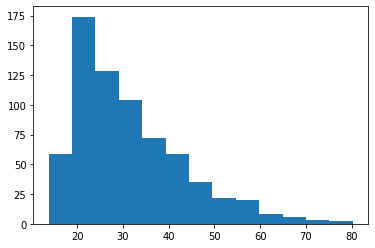

In [36]:
# Calculate max frequency bar value to fill A2 null values
bins = 13
data = df.loc[df['A2'].notnull(), 'A2'].astype(np.float64).tolist()
y, x, _ = plt.hist(data, histtype='bar', bins=bins)
y_max = y.max()
idx = np.where(y == y_max)[0][0]
A2_fill_value = x[idx] + bins/2
print(A2_fill_value)

In [37]:
# Calculate mean of A14 to fill null values
A14_fill_value = df.loc[df['A14'].notnull(), 'A14'].astype(np.float64).mean()

In [38]:
df=df.fillna({'A2':A2_fill_value,'A14':A14_fill_value})
df=df.fillna({'A1':'b', 'A3':'u', 'A6':'c', 'A9':'v'})

In [39]:
df.A2 = df.A2.astype(np.float64)
df.A14 = df.A14.astype(np.int64)

In [40]:
# encode A16 lables
df_train['A16'] = df_train['A16'].map({label:idx for idx,label in enumerate(np.unique(df_train['A16']))})
df['A1'] = df['A1'].map({label:idx for idx,label in enumerate(np.unique(df['A1']))})
df['A8'] = df['A8'].map({label:idx for idx,label in enumerate(np.unique(df['A8']))})
df['A11'] = df['A11'].map({label:idx for idx,label in enumerate(np.unique(df['A11']))})
df['A13'] = df['A13'].map({label:idx for idx,label in enumerate(np.unique(df['A13']))})


In [41]:
df.head()

,A1,A10,A11,A12,A13,A14,A15,A16,A2,A3,A5,A6,A7,A8,A9
460,0,0.000,0,0,0,120,g,NaN,24.50,y,2.415,c,0,0,v
217,1,5.000,1,5,0,0,g,NaN,55.92,u,11.500,FALSEFALSE,8851,1,FALSEFALSE
335,1,0.165,0,0,1,220,g,NaN,27.67,u,0.750,q,251,0,h
222,0,1.375,1,0,1,0,g,NaN,17.58,u,9.000,aa,0,0,v
649,0,0.000,0,6,0,0,g,NaN,35.17,u,3.750,FALSEFALSE,200,1,FALSEFALSE


In [42]:
x_A3=pd.get_dummies(df[['A3']],drop_first=True)
x_A6=pd.get_dummies(df[['A6']],drop_first=True)
x_A9=pd.get_dummies(df[['A9']],drop_first=True)
x_A15=pd.get_dummies(df[['A15']],drop_first=True)
df=pd.concat([df['A1'],df['A2'],x_A3,df['A5'],x_A6,df['A7'],df['A8'],x_A9,df['A10'],df['A11'],df['A12'],df['A13'],df['A14'],x_A15],axis=1)


In [43]:
#df.head()

In [44]:
# Separate back to train_X, and test_X and join train_y to train_X

df_train = pd.concat([df.iloc[0:-test_len], df_train['A16']], axis=1)
print("train size: ", len(df_train))

df_test = df.iloc[-test_len:]
print("test size: ",len( df_test))

train size:  690
test size:  14


In [45]:
feature_cols=df_train.drop('A16', axis=1).columns

#split dataset in features and target variable
X = df_train[feature_cols] # Features
y = df_train.A16 # Target variable

In [46]:
# Split dataset into training set and test set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1) # 70% training and 30% test

X_test = df_test

In [47]:
#-------------- Feature scaling --------------------------------------------
# random forest, decision trees do not need feature scaling

stdsc = StandardScaler()
X_train = pd.DataFrame(stdsc.fit_transform(X_train))
X_valid = pd.DataFrame(stdsc.transform(X_valid))
X_test = pd.DataFrame(stdsc.transform(X_test))

Model 1 Accuracy: 0.816425 Fscore: 0.811881 MAE: 0.183575 CorssValid: 0.84 (+/- 0.10)
Model 2 Accuracy: 0.816425 Fscore: 0.810000 MAE: 0.183575 CorssValid: 0.85 (+/- 0.12)
Model 3 Accuracy: 0.806763 Fscore: 0.756098 MAE: 0.193237 CorssValid: 0.53 (+/- 0.25)
Model 4 Accuracy: 0.797101 Fscore: 0.750000 MAE: 0.202899 CorssValid: 0.75 (+/- 0.10)
Model 5 Accuracy: 0.859903 Fscore: 0.839779 MAE: 0.140097 CorssValid: 0.86 (+/- 0.08)
Model 6 Accuracy: 0.811594 Fscore: 0.805970 MAE: 0.188406 CorssValid: 0.82 (+/- 0.12)
Model 7 Accuracy: 0.840580 Fscore: 0.827225 MAE: 0.159420 CorssValid: 0.83 (+/- 0.12)


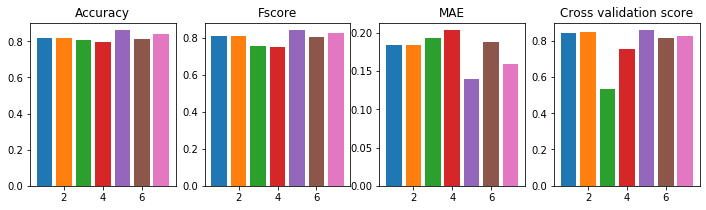

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBClassifier


model_1 = DecisionTreeClassifier(max_depth=2)
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model_3 = GaussianNB()
model_4 = KNeighborsClassifier(n_neighbors=5)
model_5 = RandomForestClassifier(n_estimators=100)
model_6 = svm.SVC(kernel='linear')
model_7 = LogisticRegression()
# model_8 = XGBClassifier()

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    A = metrics.accuracy_score(y_v, preds)
    P = metrics.precision_score(y_v, preds)
    R = metrics.recall_score(y_v, preds)
    F = 2*P*R/(P+R)
    mae = mean_absolute_error(y_v, preds)
    cvscore = cross_val_score(model, X_v, y_v, cv=5)
    return [A, F, mae, cvscore]

plt.figure(figsize=(12,3))

for i in range(0, len(models)):
    A, F, mae, cvscore = score_model(models[i])
    
    plt.subplot(141)
    plt.bar((i+1), A)
    plt.title('Accuracy')
    
    plt.subplot(142)
    plt.bar((i+1), F)
    plt.title('Fscore')
    
    plt.subplot(143)
    plt.bar((i+1), mae)
    plt.title('MAE')
    
    plt.subplot(144)
    plt.bar((i+1), cvscore.mean())
    plt.title('Cross validation score')
    
    print("Model %d Accuracy: %f Fscore: %f MAE: %f CorssValid: %.2f (+/- %.2f)" % (i+1, A, F, mae, cvscore.mean(), cvscore.std() * 2))

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ( 'model', RandomForestClassifier(n_estimators=200, random_state = 1) )
                             ])

                              
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)             

MAE scores:
 [0.15827338 0.11510791 0.13768116 0.11678832 0.10948905]


In [50]:
final_model = LogisticRegression()

from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X, X_v=X_test, y_t=y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return preds



preds = score_model(final_model)

In [51]:
#generate submission file

def submit(op):
    df_submission=pd.DataFrame(columns=['Id','Category'])
    ins=len(op)
    ids=[int(i) for i in range(1,ins+1)]
    df_submission['Id']=ids
    cat=[]
    for i in op:
        if i==0:
            cat.append('Failure')
        elif i==1:
            cat.append('Success')
    df_submission['Category']=cat

    
    df_submission.to_csv("Group_7.csv",index=False)
    return df_submission.tail()

In [52]:
submit(preds)
preds = pd.DataFrame(preds)
print(preds.head(14))

    0
0   1
1   0
2   0
3   0
4   0
5   0
6   0
7   0
8   0
9   0
10  1
11  0
12  1
13  1
